# Sprint23 LSTM

# 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


SimpleRNN
GRU
LSTM
ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。

## LSTM

In [2]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''

from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Using TensorFlow backend.
/Users/kazuya99986/.pyenv/versions/anaconda3-2021.05/envs/lab/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kazuya99986/.pyenv/versions/anaconda3-2021.05/envs/lab/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kazuya99986/.pyenv/versions/anaconda3-2021.05/envs/lab/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(

Loading data...


/Users/kazuya99986/.pyenv/versions/anaconda3-2021.05/envs/lab/lib/python3.7/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/kazuya99986/.pyenv/versions/anaconda3-2021.05/envs/lab/lib/python3.7/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train...

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 186s 7ms/step - loss: 0.4550 - accuracy: 0.7843 - val_loss: 0.4669 - val_accuracy: 0.7836
Epoch 2/5
25000/25000 [==============================] - 187s 7ms/step - loss: 0.2979 - accuracy: 0.8814 - val_loss: 0.3854 - val_accuracy: 0.8366
Epoch 3/5
25000/25000 [==============================] - 196s 8ms/step - loss: 0.2192 - accuracy: 0.9147 - val_loss: 0.4361 - val_accuracy: 0.8288
Epoch 4/5
25000/25000 [==============================] - 191s 8ms/step - loss: 0.1577 - accuracy: 0.9411 - val_loss: 0.4586 - val_accuracy: 0.8151
Epoch 5/5
25000/25000 [==============================] - 40s 2ms/step
Test score: 0.589704463365078
Test accuracy: 0

In [1]:
#LSTM実行エラー時実行（環境変数？の変更）
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

## ConvLSTM2D

/Users/kazuya99986/.pyenv/versions/anaconda3-2021.05/envs/lab/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/kazuya99986/.pyenv/versions/anaconda3-2021.05/envs/lab/lib/python3.7/site-packages/ipykernel_launcher.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Train on 950 samples, validate on 50 samples
Epoch 1/10
950/950 [==============================] - 710s 747ms/step - loss: 0.2620 - val_loss: 0.4751
Epoch 2/10
950/950 [==============================] - 787s 828ms/step - loss: 0.0302 - val_loss: 0.2627
Epoch 3/10
950/950 [==============================] - 723s 761ms/step - loss: 0.0113 - val_loss: 0.2822
Epoch 4/10
950/950 [==============================] - 671s 706ms/step - loss: 0.0023 - val_loss: 0.3753
Epoch 5/10
950/950 [==============================] - 740s 779ms/step - loss: 0.0011 - val_loss: 0.2496
Epoch 6/10
950/950 [==============================] - 717s 754ms/step - loss: 6.8934e-04 - val_loss: 0.0366
Epoch 7/10
950/950 [==============================] - 676s 711ms/step - loss: 4.9976e-04 - val_loss: 0.0048
Epoch 8/10
950/950 [==============================] - 694s 731ms/step - loss: 4.0870e-04 - val_loss: 5.7167e-04
Epoch 9/10
950/950 [==============================] - 733s 771ms/step - loss: 3.4056e-04 - val_loss: 3.4293

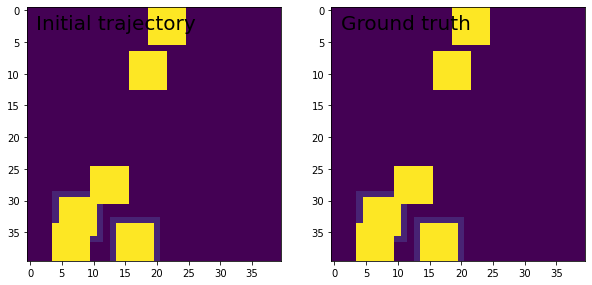

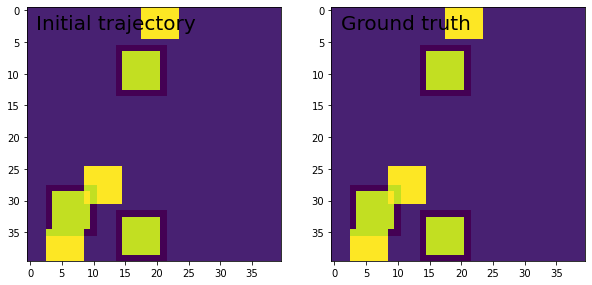

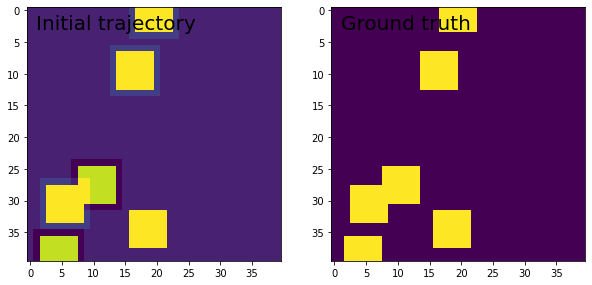

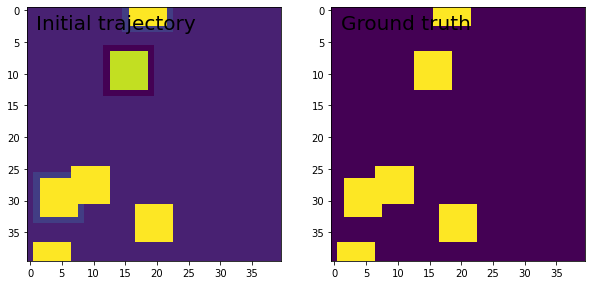

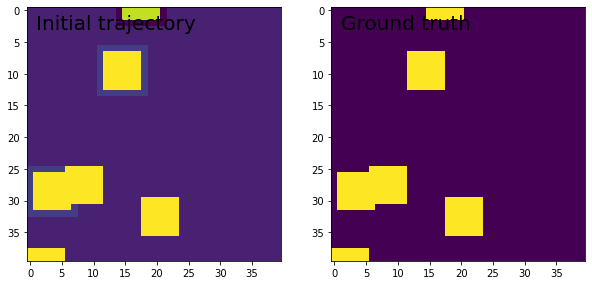

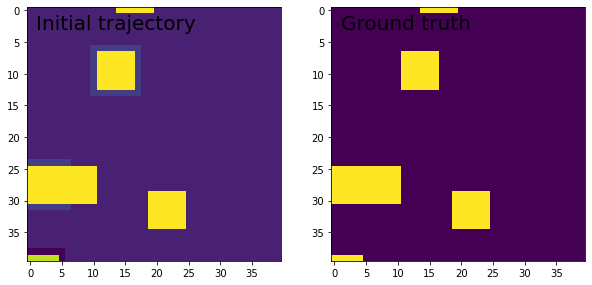

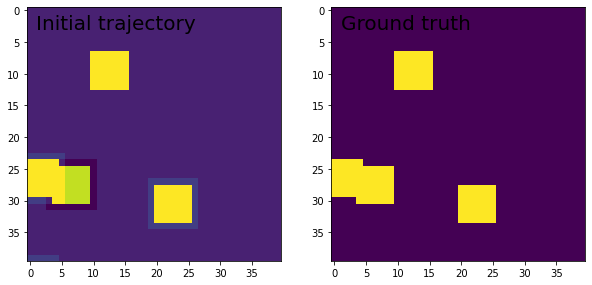

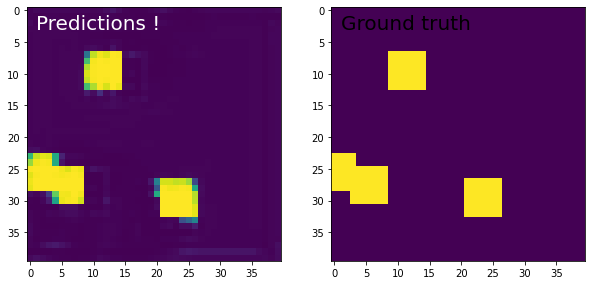

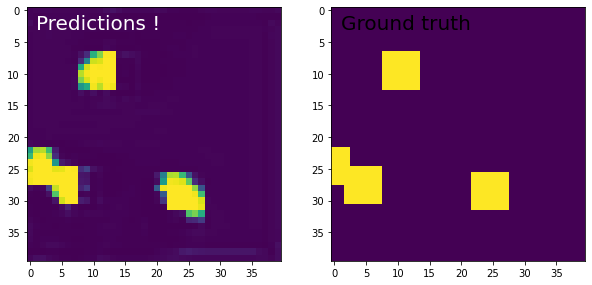

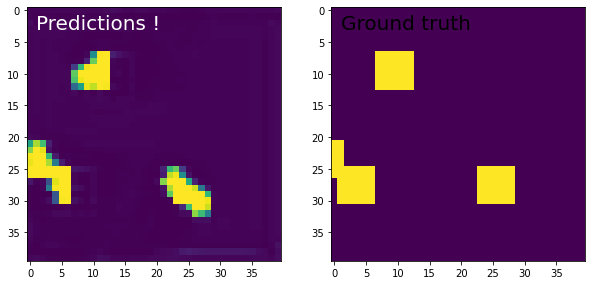

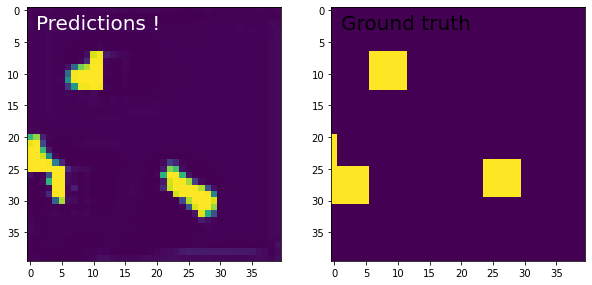

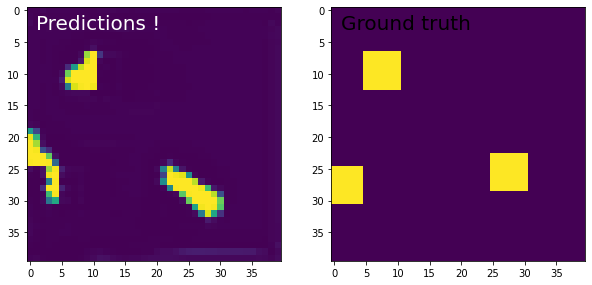

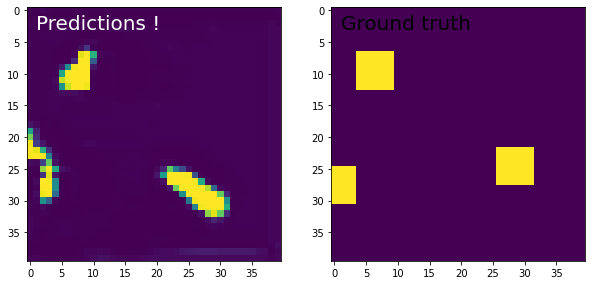

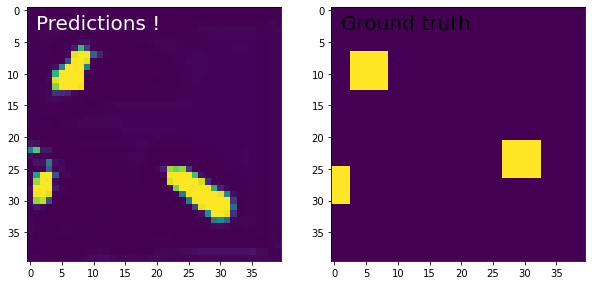

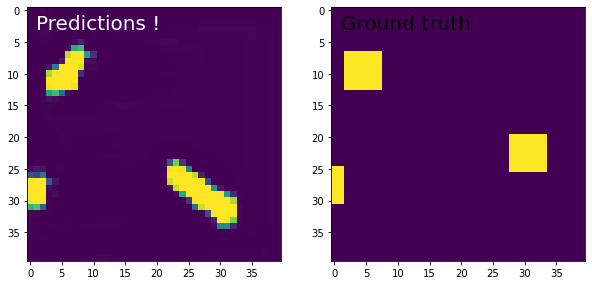

In [3]:
""" This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=10, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

# 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


- RNN  
一般的なRNN  
  
- SimpleRNNCell  
- GRUCell  
- LSTMCell  
入力シークエンスのバッチ全体を処理する RNN 層と違い、RNN セルは単一の時間ステップだけを処理します  
セルは RNN 層の for ループの内側にあります。tf.keras.layers.RNN 層の内側でのセルのラッピングはシークエンスのバッチを処理できる層を与えます  
 
- StackedRNNCells  
RNNセルのスタックが単一のセルとして動作できるようにするラッパー  
  
- CuDNNGRU  
CuDNN（GPU アクセラレーション型のプリミティブのライブラリ）を活用しGPUの処理を早め、GRUの高速化を実現する為の機能

- CuDNNLSTM  
CuDNN（GPU アクセラレーション型のプリミティブのライブラリ）を活用しGPUの処理を早め、LSTMの高速化を実現する為の機能


# LSTM
- 長期記憶と短期記憶の合わせ技、ゲート付きRNN
- simpleRNNは記憶力が悪いの欠点。短い内容なら問題ないが、長い内容には使えない
- 忘却と追加はgateと呼ばれる機能を用いて行われる

授業スライド： https://drive.google.com/file/d/1tgzEUdvO8jswA73u324ekTPNmZsBZAot/view?usp=sharing  
AIcia Solid Project: https://www.youtube.com/watch?v=oxygME2UBFc